<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3BB9FF ;font-family:newtimeroman;color:white;font-size:250%;text-align:center;border-radius:50px 1px;">  MOVIE RATING PREDICTION WITH PYTHON  </p>
 
 <ul style = color:#25383C;font-size:150%;font-family:Serif;>
    <li> Import librarries </li>
    <li> Read dataset</li>
    <li> Data cleaning</li>
    <li> Data visualization</li>
    <li> Import librarries Of Machine Learning</li>
    <li> Data preprocessing</li>
</ul>

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read  Data 
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
14237,The Secret in the Wind,(2021),NaN,"Drama, Mystery",NaN,NaN,Chandradeep Das,Thomas Raft,NaN,NaN
5770,Hoor-E-Misar,(1932),NaN,NaN,NaN,NaN,Homi Master,NaN,NaN,NaN
49,2 Little Indians,(2013),NaN,"Comedy, Family",5.6,14,Ravi Bhatia,Ravi Bhatia,Ronak Bhatia,Kamal Chopra
6820,Jothi Malar,(1943),NaN,Drama,NaN,NaN,Ramanarayanan,NaN,NaN,NaN
12272,Salma Pe Dil Aa Gaya,(1997),149 min,Drama,5.6,26,Saawan Kumar Tak,Ayub Khan,Saadhika,Milind Gunaji


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df['Year'].fillna(df['Year'].value_counts().index[0],inplace=True)

In [10]:
df['Duration'].fillna(df['Duration'].value_counts().index[0],inplace=True)
df['Genre'].fillna(df['Genre'].value_counts().index[0],inplace=True)
df['Rating'].fillna(df['Rating'].value_counts().index[0],inplace=True)
df['Votes'].fillna(df['Votes'].value_counts().index[0],inplace=True)
df['Director'].fillna(df['Director'].value_counts().index[0],inplace=True)
df['Actor 1'].fillna(df['Actor 1'].value_counts().index[0],inplace=True)
df['Actor 2'].fillna(df['Actor 2'].value_counts().index[0],inplace=True)
df['Actor 3'].fillna(df['Actor 3'].value_counts().index[0],inplace=True)

In [11]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df.duplicated().sum()

6

In [13]:
df[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),120 min,Action,6.2,8,Master Bhagwan,Meena Rai,Dara Singh,Pran
1769,Balidan,(1992),120 min,Drama,6.2,8,Jayant Desai,Ashok Kumar,Rekha,Pran
4723,First Time - Pehli Baar,(2009),120 min,Drama,6.2,8,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,(2019),120 min,Thriller,6.2,8,Shiva Dagar,Ashok Kumar,Rekha,Pran
13069,Shivani,(2019),120 min,Crime,6.2,8,Ugresh Prasad Ujala,Santosh,Rekha,Pran
13308,Slumdog Karodpati,(2019),118 min,Thriller,6.2,8,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 [Text(0, 0, '1.1'),
  Text(1, 0, '1.4'),
  Text(2, 0, '1.6'),
  Text(3, 0, '1.7'),
  Text(4, 0, '1.8'),
  Text(5, 0, '1.9'),
  Text(6, 0, '2.0'),
  Text(7, 0, '2.1'),
  Text(8, 0, '2.2'),
  Text(9, 0, '2.3'),
  Text(10, 0, '2.4'),
  Text(11, 0, '2.5'),
  Text(12, 0, '2.6'),
  Text(13, 0, '2.7'),
  Text(14, 0, '2.8'),
  Text(15, 0, '2.9'),
  Text(16, 0, '3.0'),
  Text(17, 0, '3.1'),
  Text(18, 0, '3.2'),
  Text(19, 0, '3.3'),
  Text(20, 0, '3.4'),
  Text(21, 0, '3.5'),
  Text(22, 0, '3.6'),
  Text(23, 0, '3.7'),
  Text(24, 0, '3.8'),
  Text(25, 0, '3.9'),
  Text(26, 0, '4.0'),
  Text(27, 0, '4.1'),
  Text(28, 0, '4

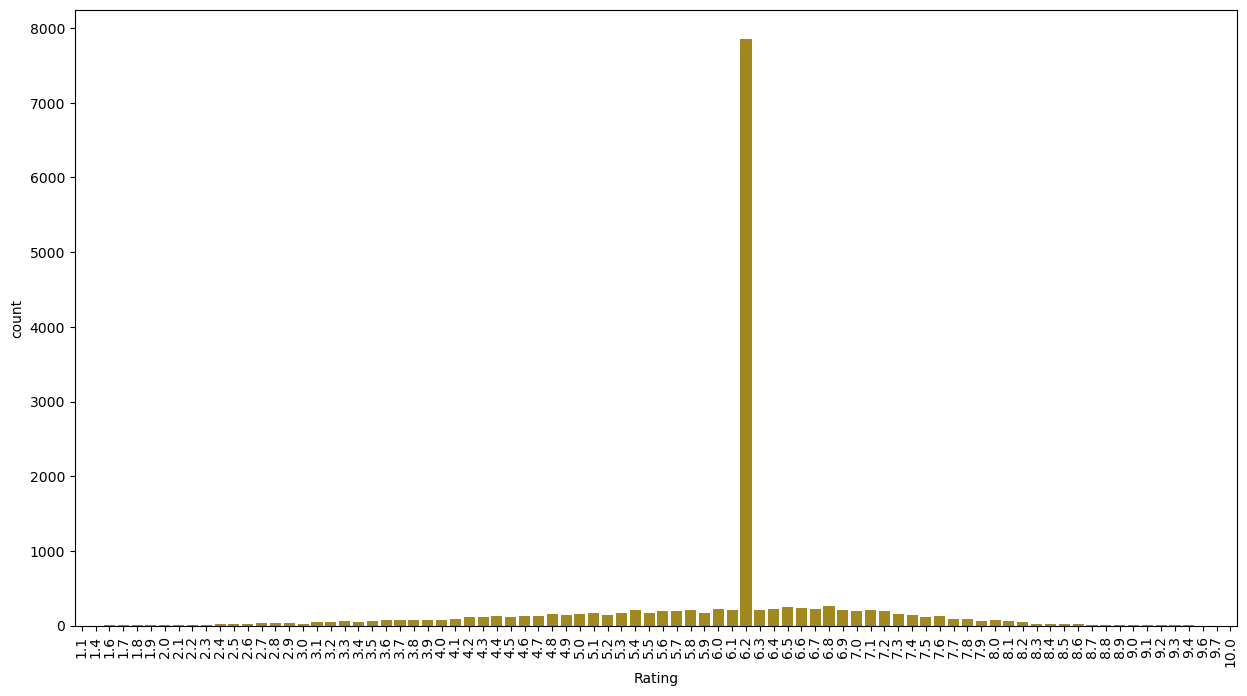

In [16]:
plt.figure(figsize=(15,8))
sns.countplot('Rating',color='#B7950B',data=df)
plt.xticks(rotation = 'vertical')

In [17]:
top_rates=df.groupby('Genre').mean().sort_values('Rating',ascending=False).head(10)
top_rates = top_rates[['Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,Rating
0,"History, Romance",9.40
1,"Documentary, Family, History",9.30
2,"Documentary, Sport",8.60
3,"Animation, Comedy, Family",8.30
4,"Biography, Family",8.30
5,"Documentary, Thriller",8.25
6,"Documentary, Biography, Family",8.25
7,"Documentary, Biography, Sport",8.20
8,"Drama, Musical, Sport",8.10
9,"Documentary, Biography, Musical",8.05


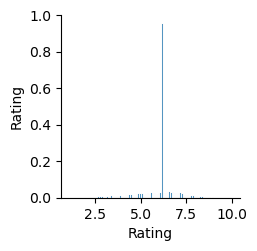

In [18]:
sns.pairplot(df)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])
df_encoded = pd.get_dummies(df, columns=['Genre'], prefix=['Genre'])

In [20]:
x = df[[ 'Genre', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']]
y = df[['Rating']]

In [21]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=40)

In [22]:
model = LogisticRegression()


In [ ]:
# predict and accuracy

model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
# model 
model = RandomForestRegressor()

model.fit(x_train , y_train)

In [ ]:
# predict and accuracy
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)